In [1]:
# 遺伝的アルゴリズムの実装
# 巡回セールスマン問題を解いてみる

In [5]:
import numpy as np
import matplotlib.animation as animation
import matplotlib.pyplot as plt
%matplotlib inline

In [88]:
def perm_circle(n):
    perm = []
    #print(perm)
    
    def sub(l, m):
        if m == n:
            perm.append(l)
        else:
            p = tuple(l)
            sub_l = [i+1 for i in range(n) if not i+1 in p]
            for i in sub_l:
                p = tuple(l) + (i, )
                sub(p, m+1)
    sub([], 0)
    return perm
    
perm = perm_circle(3)
print(perm, len(perm))

[(1, 2, 3), (1, 3, 2), (2, 1, 3), (2, 3, 1), (3, 1, 2), (3, 2, 1)] 6


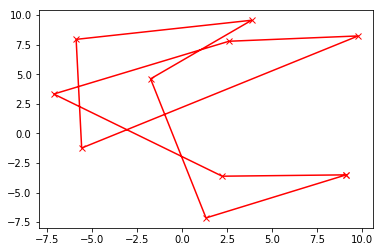

In [3]:
class SalesmanProblem(object):
    city_pt = None
    city_n = 10
    
    def __init__(self):
        n = SalesmanProblem.city_n
        self.permutation = np.random.choice([i for i in range(n)], size=n, replace=False)
        self.evaluation = np.Inf
        
    def getCityNum():
        return SalesmanProblem.city_n
    
    def setCityNum(n):
        SalesmanProblem.city_n = n
        SalesmanProblem.resetCityPosition()
        
    def resetCityPosition():
        n = SalesmanProblem.city_n
        SalesmanProblem.city_pt = np.random.uniform(-10, 10, (n, 2))
        
    def getPermutation(self):
        return self.permutation
    
    def setPermutation(self, perm):
        if perm.shape == self.permutation.shape:
            self.permutation = perm
        else:
            print("not much shape of permutation!")
    
    def evaluate(self):
        p1, p2, e = 0, 0, 0
        for j, i in enumerate(self.permutation):
            if j == 0:
                p1 = self.city_pt[i]
            else:
                p2 = p1
                p1 = self.city_pt[i]
                d = np.linalg.norm(p1 - p2)
                e += d
                
        self.evaluation = e
        return e
    
    def plotRoute(self):
        permute_pt = np.array([self.city_pt[i] for i in self.permutation])
        permute_pt = np.concatenate([permute_pt,permute_pt[0:1]])

        plt.clf()
        #plt.subplot(121)
        plt.plot(permute_pt[:,0], permute_pt[:,1], "rx-")
        #plt.subplot(122)
        #plt.plot(permute_pt[:,0], permute_pt[:,1], "rx")
        # print(self.evaluate())
    
sp = [SalesmanProblem() for i in range(5)]
SalesmanProblem.resetCityPosition()
for s in sp:
    s.plotRoute()

In [152]:
class GeneticAlgorithm(object):
    def __init__(self, n = 10, m=10):
        self.n = n
        self.generation = 0
        SalesmanProblem.setCityNum(m)
        SalesmanProblem.resetCityPosition()
        self.current_generation = [SalesmanProblem() for i in range(n)]
        self.next_generation = []
        self.evaluation = None
        self.evaluate()
        
    def encode(self, x):
        pass
    
    def decode(self, y):
        pass
    
    def getGeneration(self):
        return self.generation 
    
    def evaluate(self):
        evaluation = np.array([1/sp.evaluate() for sp in self.current_generation])
        self.evaluation = evaluation
        return evaluation
    
    def checkGeneration(self):
        if self.n == len(self.next_generation):
            self.generation += 1
            
            group = self.current_generation + self.next_generation
            evaluation = [(1/sp.evaluate(), sp) for sp in group]
            evaluation = sorted(evaluation, key=lambda x:x[0], reverse=True)
            
            self.current_generation = [sp for e, sp in evaluation][:self.n]
            self.next_generation = []
            self.evaluate()
            
            print(np.max(self.evaluation))
            self.getBestIndividual().plotRoute()
    
    def selectIndividual(self, n=1):
        p = self.evaluation
        p /= p.sum()
        index = np.random.choice([i for i in range(self.n)], n, False, p)
        return [self.current_generation[i] for i in index]
    
    def getBestIndividual(self):
        return self.current_generation[self.evaluation.argmax()]
    
    def clossover(self, swap_n=2):
        i = self.selectIndividual(2)
        
        n = SalesmanProblem.getCityNum()
        swap = np.random.choice([j for j in range(n)], swap_n, False)
        no_swap = np.array([j for j in range(n) if not j in swap])
        
        choice = np.sort(np.array([1/j.evaluate() for j in i]))[::-1]
        choice = choice.astype(np.int)
        p1 = i[choice[0]].getPermutation()
        p2 = i[choice[1]].getPermutation()
        
        perm = -np.ones(n)
        perm[swap] = p2[swap]
        perm[no_swap] = np.array([p for p in p1 if not p in perm])
        perm = perm.astype(np.int)
        
        p = SalesmanProblem()
        p.setPermutation(perm)
        self.next_generation.append(p)

    def copy(self):
        i, = self.selectIndividual()
        self.next_generation.append(i)
        
    def mutation(self):
        i, = self.selectIndividual()
        
        n = SalesmanProblem.getCityNum()
        for k in range(2):
            swap = np.random.choice([j for j in range(n)], 2, False)
            perm = i.getPermutation()
            x,y = perm[swap]
            perm[swap] = np.array([y,x])
            
        i.setPermutation(perm)
        self.next_generation.append(i)
    
    def selectAction(self, p=[0.85, 0.10, 0.05]):
        s = np.random.choice([0,1,2], 1, p=p)
        if s == 0: self.clossover()
        elif s == 1: self.copy()
        elif s == 2: self.mutation()
            
ga = GeneticAlgorithm(50, 20)

In [153]:
def plot(data):
    for i in range(0):
        ga.checkGeneration()
        ga.selectAction()

In [154]:
plot(0)

0.0071421101466536486
0.0071421101466536486
0.0071421101466536486
0.0071421101466536486
0.0071421101466536486
0.007945386846478138
0.007945386846478138
0.007945386846478138
0.007945386846478138
0.007945386846478138
0.008431666067595874
0.008431666067595874


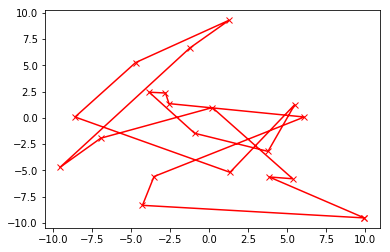

In [151]:
fig = plt.figure()
ani = animation.FuncAnimation(fig, plot, interval=100, frames=10)
ani.save("output.gif", writer="imagemagick")

In [133]:
sorted([i for i in np.random.randint(0, 10, 10)], reverse=True)

[9, 9, 7, 6, 4, 4, 4, 3, 3, 2]